In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='paper')

In [2]:
import os
dpath = 'trait_gene_annotations'
os.listdir(dpath)

['10cc_experimental_traits.xlsx',
 '10cc_signalP.csv',
 '42003_2022_3184_MOESM4_ESM_select_genomes.xlsx',
 'brenda_2024_1.json.tar.gz',
 'brenda_results_extracellluar enzymes.xlsx',
 'genetic_traits_table.tsv',
 'genetic_traits_table_filtered.tsv',
 'genomes_annotation_long_format.7z',
 'kegg_pathways.csv',
 'MASTER_table.tsv',
 'N related  enzymes.xlsx',
 'ROS related  enzymes.xlsx',
 'signalp',
 'strain_list.csv']

In [3]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [4]:
horder = ['Alteromonas macleodii 1A3',
 'Pseudoalteromonas haloplanktis',
 'Sulfitobacter pseudonitzschiae',
 'Ruegeria pomeroyi',
 'Marinovum 5F3',
 'Roseovarius 5C3',
 'Marinobacter adhaerens HP15',
 'Phaeobacter gallaeciensis',
]

In [5]:
horder_tmp = [ #'HOT1A3', 'CIP', 'nitzsch', 'HOT5_F3','HOT5_C3', 'HP15', 'Pgall',]
'Alteromonas macleodii HOT1A3',
 'Pseudoalteromonas haloplanktis TAC125',
 'Sulfitobacter pseudonitzschiae strain SMR1',
 'Ruegeria pomeroyi DSS-3',
 'Marinovum HOT5_F3',
 'Roseovrius HOT5_C3',
 'Marinobacter adhaerens HP15',
 'Phaeobacter gallaeciensis DSM 26640',
]
horder_r = list(reversed(horder))

In [6]:
gorder_full = [
'Strong',
 'Strong',
 'Sustained',
 'Sustained',
 'Weak',
 'Weak',
 'Inhibited',
 'Inhibited',
]

gpalette_dict = dict(zip(gorder, gpalette))
hpalette_g = [gpalette_dict[i] for i in gorder_full]
sns.color_palette(hpalette_g)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.8, 0.4, 0.4666666666666667),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.2, 0.13333333333333333, 0.5333333333333333)]

In [7]:
import os
df = pd.read_csv('genome_stats.csv')


In [8]:
exo_df = pd.read_excel('experimental assays/10cc ROS and proteolytic result.xlsx', sheet_name='proteolytic', skiprows=1)
ros_df = pd.read_excel('experimental assays/10cc ROS and proteolytic result.xlsx', sheet_name='ROS detoxification', skiprows=1)


In [9]:
# add the experimental results columns to the table

In [10]:
exo_df['Avg2'] = exo_df['Avg']
exo_df['SD2'] = exo_df['SD']
exo_df.loc[exo_df['Avg2'].lt(0), 'SD'] = 'ND'
exo_df.loc[exo_df['Avg2'].lt(0), 'Avg'] = 'ND'


C:\Users\oweisberg\AppData\Local\Temp\ipykernel_9464\1906443933.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'ND' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  exo_df.loc[exo_df['Avg2'].lt(0), 'SD'] = 'ND'
C:\Users\oweisberg\AppData\Local\Temp\ipykernel_9464\1906443933.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'ND' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  exo_df.loc[exo_df['Avg2'].lt(0), 'Avg'] = 'ND'


In [11]:
pexo_df = exo_df.pivot(index='Species', columns='Assay', values=['Avg', 'SD']).reorder_levels([1,0], axis='columns')


In [12]:
pexo_df.columns = [' '.join(reversed(col)).strip() for col in pexo_df.columns.values]
pexo_df

,Avg Chemotrypsin-like activity (fmole product cell-1 h-1),Avg Leucine aminopeptidase (fmole product cell-1 h-1),Avg Tryipsin-like (fmole product cell-1 h-1),SD Chemotrypsin-like activity (fmole product cell-1 h-1),SD Leucine aminopeptidase (fmole product cell-1 h-1),SD Tryipsin-like (fmole product cell-1 h-1)
Species,,,,,,
Alteromonas macleodii 1A3,0.030077,0.352445,0.011894,0.001338,0.071234,0.000531
Marinobacter adhaerens HP15,ND,0.016043,ND,ND,0.000838,ND
Marinovum 5F3,ND,0.007109,0.030547,ND,0.001791,0.001028
Phaeobacter gallaeciensis,0.008587,0.117446,ND,0.00198,0.005516,ND
Prochlorococcus MED4,ND,0.000213,ND,ND,0.000107,ND
Pseudoalteromonas haloplanktis,0.005858,0.235881,0.006563,0.00273,0.019269,0.000798
Roseovarius 5C3,ND,0.012951,ND,ND,0.000313,ND
Sulfitobacter pseudonitzschiae,ND,0.030105,ND,ND,0.000511,ND


In [13]:
pexo_df.columns

Index(['Avg Chemotrypsin-like activity (fmole product cell-1 h-1)',
       'Avg Leucine aminopeptidase (fmole product cell-1 h-1)',
       'Avg Tryipsin-like (fmole product cell-1 h-1)',
       'SD Chemotrypsin-like activity (fmole product cell-1 h-1)',
       'SD Leucine aminopeptidase (fmole product cell-1 h-1)',
       'SD Tryipsin-like (fmole product cell-1 h-1)'],
      dtype='object')

In [14]:
pexocols = [
       'Avg Leucine aminopeptidase (fmole product cell-1 h-1)',
       'SD Leucine aminopeptidase (fmole product cell-1 h-1)',
       'Avg Tryipsin-like (fmole product cell-1 h-1)',
       'SD Tryipsin-like (fmole product cell-1 h-1)',
    'Avg Chemotrypsin-like activity (fmole product cell-1 h-1)',
       'SD Chemotrypsin-like activity (fmole product cell-1 h-1)',
]
pexo_df = pexo_df.reindex(columns=pexocols)

pexo_df = pexo_df.reindex(columns=[
    'Leucine aminopeptidase (fmole product cell-1 h-1)', 
    'Tryipsin-like (fmole product cell-1 h-1)',
    'Chemotrypsin-like activity (fmole product cell-1 h-1)' ], level='Assay')

                    

In [15]:

pros_df = ros_df.pivot(index='Species', columns='Assay', values=['Avg', 'SD']).reorder_levels([1,0], axis='columns')
pros_df.columns = [' '.join(reversed(col)).strip() for col in pros_df.columns.values]
pros_df


,Avg H2O2 degradation rate (fmoles cell-1 h-1),SD H2O2 degradation rate (fmoles cell-1 h-1)
Species,,
Alteromonas macleodii 1A3,0.074066,0.015735
Marinobacter adhaerens HP15,0.009453,0.000006
Marinovum 5F3,0.026033,0.003789
Phaeobacter gallaeciensis,0.160295,0.017415
Pseudoalteromonas haloplanktis,0.059935,0.014557
Roseovarius 5C3,0.005901,0.003349
Ruegeria pomeroyi,0.007195,0.001085
Sulfitobacter pseudonitzschiae,0.009756,0.001152


In [16]:
df = pd.merge(df, pexo_df, left_on='Species', right_index=True, how='left')
df = pd.merge(df, pros_df, left_on='Species', right_index=True, how='left')
df

,Coculture Outcome,Species,GTDB taxonomy,NCBI taxonID,Accession number,Number of genes,genes with EC/KO,Predicted extracellular enzymes,Predicted extracellular proteolytic enzymes,Total proteolytic enzymes,...,Isolation notes,Ref,Avg Leucine aminopeptidase (fmole product cell-1 h-1),SD Leucine aminopeptidase (fmole product cell-1 h-1),Avg Tryipsin-like (fmole product cell-1 h-1),SD Tryipsin-like (fmole product cell-1 h-1),Avg Chemotrypsin-like activity (fmole product cell-1 h-1),SD Chemotrypsin-like activity (fmole product cell-1 h-1),Avg H2O2 degradation rate (fmoles cell-1 h-1),SD H2O2 degradation rate (fmoles cell-1 h-1)
0,Strong,Alteromonas macleodii 1A3,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,529120.0,2687454166,4366,2664,828,10,30,...,seawater,48,0.352445,0.071234,0.011894,0.000531,0.030077,0.001338,0.074066,0.015735
1,Strong,Pseudoalteromonas haloplanktis,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,326442.0,GCA_000026085.1,3647,2395,684,18,35,...,"seawater, Adelia Land, https://img.jgi.doe.gov...",49,0.235881,0.019269,0.006563,0.000798,0.005858,0.00273,0.059935,0.014557
2,Sustained,Sulfitobacter pseudonitzschiae,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,1402135.0,CeMEB_private,5190,3265,595,6,24,...,"baltic sea, Smarinoi associated",10,0.030105,0.000511,ND,ND,ND,ND,0.009756,0.001152
3,Sustained,Ruegeria pomeroyi,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,246200.0,GCA_000011965.2,4575,2899,583,8,24,...,"estuary seawater Georgia, https://www.ncbi.nlm...",6,NaN,NaN,NaN,NaN,NaN,NaN,0.007195,0.001085
4,Weak,Marinovum 5F3,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,NaN,GCF_900109145.1,5810,3447,670,7,24,...,NaN,45,0.007109,0.001791,0.030547,0.001028,ND,ND,0.026033,0.003789
5,Weak,Roseovarius 5C3,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,NaN,GCF_030733425.1,4423,2636,588,7,22,...,NaN,45,0.012951,0.000313,ND,ND,ND,ND,0.005901,0.003349
6,Inhibited,Marinobacter adhaerens HP15,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,225937.0,650377991,4541,2850,669,7,25,...,plankton net (0.1 mm pore size) German Wadden Sea,47,0.016043,0.000838,ND,ND,ND,ND,0.009453,0.000006
7,Inhibited,Phaeobacter gallaeciensis,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,1423144.0,GCA_000511385.1,4566,2767,590,6,26,...,"seawater scallop, https://www.ncbi.nlm.nih.gov...",36,0.117446,0.005516,ND,ND,0.008587,0.00198,0.160295,0.017415


In [17]:
df.columns

Index(['Coculture Outcome', 'Species', 'GTDB taxonomy', 'NCBI taxonID',
       'Accession number', 'Number of genes', 'genes with EC/KO',
       'Predicted extracellular enzymes',
       'Predicted extracellular proteolytic enzymes',
       'Total proteolytic enzymes', 'Predicted extracellular ROS enzymes',
       'Total ROS enzymes', 'Inoculum [cell ml-1]',
       'MPN1 on day 120 [cell ml-1]', 'Repository', 'Length (Mbp)', 'GC %',
       'Completeness %', 'Contamination %', 'Strain heterogeneity %',
       'Scaffolds', 'Contigs', '#genes', 'Gene annotated %', 'Reason Selected',
       'Isolation source', 'Isolation notes', 'Ref',
       'Avg Leucine aminopeptidase (fmole product cell-1 h-1)',
       'SD Leucine aminopeptidase (fmole product cell-1 h-1)',
       'Avg Tryipsin-like (fmole product cell-1 h-1)',
       'SD Tryipsin-like (fmole product cell-1 h-1)',
       'Avg Chemotrypsin-like activity (fmole product cell-1 h-1)',
       'SD Chemotrypsin-like activity (fmole product cel

In [26]:
cols = [
    'species_id',
#           'Predicted extracellular enzymes',
       'Predicted extracellular proteolytic enzymes',
    #   'Total proteolytic enzymes', 
    'Predicted extracellular ROS enzymes',
     #  'Total ROS enzymes', 
       'Avg Leucine aminopeptidase (fmole product cell-1 h-1)',
       'Avg Tryipsin-like (fmole product cell-1 h-1)',
       'Avg Chemotrypsin-like activity (fmole product cell-1 h-1)',
       'Avg H2O2 degradation rate (fmoles cell-1 h-1)',

]

In [27]:
dfshow = df[[
    'Coculture Outcome',
     'Species', 
       'Predicted extracellular enzymes',
       'Predicted extracellular proteolytic enzymes',
       'Total proteolytic enzymes', 'Predicted extracellular ROS enzymes',
       'Total ROS enzymes', 
       'Avg Leucine aminopeptidase (fmole product cell-1 h-1)',
       'Avg Tryipsin-like (fmole product cell-1 h-1)',
       'Avg Chemotrypsin-like activity (fmole product cell-1 h-1)',
       'Avg H2O2 degradation rate (fmoles cell-1 h-1)',
]].copy()

In [28]:
dfshow = dfshow.reset_index(names='species_id')
dfshow['species_id'] = 7 - dfshow['species_id']

In [29]:
for c in cols:
    dfshow.loc[dfshow[c].isin(['ND']), c] = 0
    dfshow.loc[dfshow[c].isna(), c] = 0
    dfshow[c] = pd.to_numeric(dfshow[c])
    

In [30]:
gpalette_dict

{'Strong': '#882255',
 'Sustained': '#CC6677',
 'Inhibited': '#332288',
 'Weak': '#44AA99',
 'Neutral': '#88CCEE',
 'Other': '#D0CFCA'}

In [32]:
dfshow

,species_id,Coculture Outcome,Species,Predicted extracellular enzymes,Predicted extracellular proteolytic enzymes,Total proteolytic enzymes,Predicted extracellular ROS enzymes,Total ROS enzymes,Avg Leucine aminopeptidase (fmole product cell-1 h-1),Avg Tryipsin-like (fmole product cell-1 h-1),Avg Chemotrypsin-like activity (fmole product cell-1 h-1),Avg H2O2 degradation rate (fmoles cell-1 h-1)
0,7,Strong,Alteromonas macleodii 1A3,828,10,30,5,16,0.352445,0.011894,0.030077,0.074066
1,6,Strong,Pseudoalteromonas haloplanktis,684,18,35,4,16,0.235881,0.006563,0.005858,0.059935
2,5,Sustained,Sulfitobacter pseudonitzschiae,595,6,24,3,10,0.030105,0.000000,0.000000,0.009756
3,4,Sustained,Ruegeria pomeroyi,583,8,24,5,13,0.000000,0.000000,0.000000,0.007195
4,3,Weak,Marinovum 5F3,670,7,24,1,9,0.007109,0.030547,0.000000,0.026033
5,2,Weak,Roseovarius 5C3,588,7,22,3,12,0.012951,0.000000,0.000000,0.005901
6,1,Inhibited,Marinobacter adhaerens HP15,669,7,25,2,13,0.016043,0.000000,0.000000,0.009453
7,0,Inhibited,Phaeobacter gallaeciensis,590,6,26,4,14,0.117446,0.000000,0.008587,0.160295


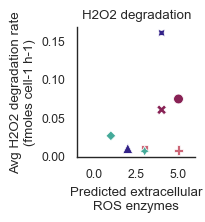

In [44]:
for i in [
       'Avg H2O2 degradation rate (fmoles cell-1 h-1)',
]:
    xcol =  'Predicted extracellular ROS enzymes'
    xmax = dfshow[xcol].max()
    ylabel = i.replace(' (', '\n(')
    title = 'H2O2 degradation'
    xlabel = 'Predicted extracellular\nROS enzymes'
    g = sns.relplot(
        data=dfshow,
        x=xcol,
        y=i,
        hue='Species', hue_order=horder, palette=hpalette_g,
        style='Species', style_order=horder,
        height=2, legend=False,
        s=50,
    )
    g.set(
        ylabel=ylabel, title=title, xlabel=xlabel, xlim = (-1,xmax+1)
    )


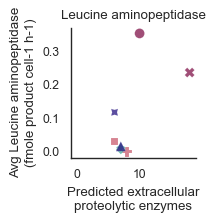

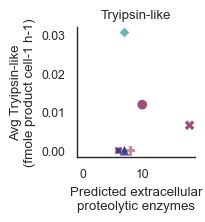

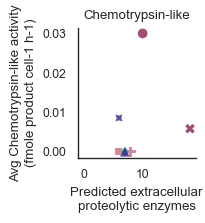

In [47]:
for i in [
           'Avg Leucine aminopeptidase (fmole product cell-1 h-1)',
       'Avg Tryipsin-like (fmole product cell-1 h-1)',
       'Avg Chemotrypsin-like activity (fmole product cell-1 h-1)',
]:
    xcol =  'Predicted extracellular proteolytic enzymes'
    xmax = dfshow[xcol].max()
    ylabel = i.replace(' (', '\n(')
    title = i.replace(' (fmole product cell-1 h-1)','').replace('Avg ','').replace(' activity','')
    xlabel = 'Predicted extracellular\nproteolytic enzymes'
    g = sns.relplot(
        data=dfshow,
        x=xcol,
        y=i,
        hue='Species', hue_order=horder, palette=hpalette_g,
        style='Species', style_order=horder,
        height=2, legend=False,
        s=50, lw=0.1, alpha=0.8,
    )
    g.set(
        ylabel=ylabel, title=title, xlabel=xlabel, xlim = (-1,xmax+1)
    )

In [63]:
exo_cols_labels = [
  #  'Species',
#           'Predicted extracellular enzymes',
       'Extracellular proteolytic enzymes',
       'Total proteolytic enzymes', 
    #'ROS enzymes',
     #  'Total ROS enzymes', 
       'Leucine aminopeptidase',
       'Tryipsin-like',
       'Chemotrypsin-like',
     #  'H2O2 degradation',

]

In [64]:
dfshow['color'] = dfshow['Coculture Outcome'].map(gpalette_dict)

In [72]:
dfshow['Species_short'] = dfshow['Species'].str.replace(r' .*', '', regex=True)


In [65]:
exocols = [
    #'species_id',
#           'Predicted extracellular enzymes',
       'Predicted extracellular proteolytic enzymes',
       'Total proteolytic enzymes', 
    #'Predicted extracellular ROS enzymes',
     #  'Total ROS enzymes', 
       'Avg Leucine aminopeptidase (fmole product cell-1 h-1)',
       'Avg Tryipsin-like (fmole product cell-1 h-1)',
       'Avg Chemotrypsin-like activity (fmole product cell-1 h-1)',
    #   'Avg H2O2 degradation rate (fmoles cell-1 h-1)',

]

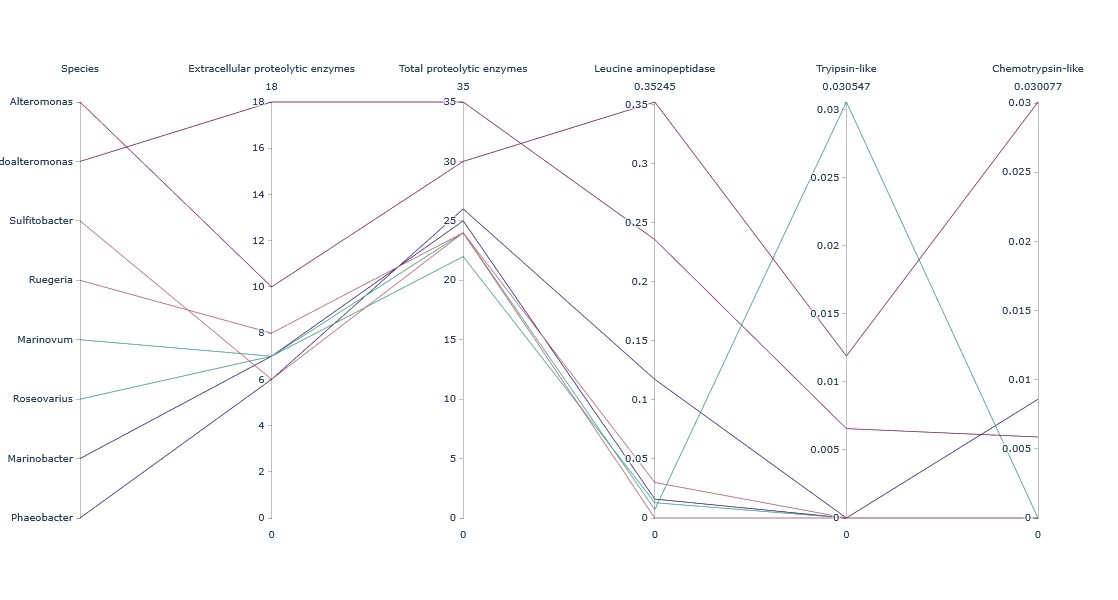

In [75]:
import plotly.graph_objects as go


fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = dfshow['species_id'],
                   #colorscale = list(zip(dfshow.species_id, dfshow.color)),
                   colorscale = list(reversed(hpalette_g)),
                    #width = 6,
                    #width = 3, 
                   ),
        dimensions = list(
            [
                dict(range = [0, dfshow['species_id'].max()],
                     label = 'Species', values = dfshow['species_id'], tickvals =dfshow['species_id'], ticktext = dfshow['Species_short'])
            ] + [
                dict(range = [0, dfshow[c].max()],
                     label = l, values = dfshow[c]) for c,l in zip(exocols, exo_cols_labels)
            ]
        )
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    width=1200,   #  Set desired width in pixels
    height=600,  #  Set desired height in pixels
)

fig.show()

In [51]:
dfshow.dtypes

species_id                                                     int64
Coculture Outcome                                             object
Species                                                       object
Predicted extracellular enzymes                                int64
Predicted extracellular proteolytic enzymes                    int64
Total proteolytic enzymes                                      int64
Predicted extracellular ROS enzymes                            int64
Total ROS enzymes                                              int64
Avg Leucine aminopeptidase (fmole product cell-1 h-1)        float64
Avg Tryipsin-like (fmole product cell-1 h-1)                 float64
Avg Chemotrypsin-like activity (fmole product cell-1 h-1)    float64
Avg H2O2 degradation rate (fmoles cell-1 h-1)                float64
color                                                         object
dtype: object

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = dfshow.copy()
df_scaled[cols] = scaler.fit_transform(dfshow[cols])

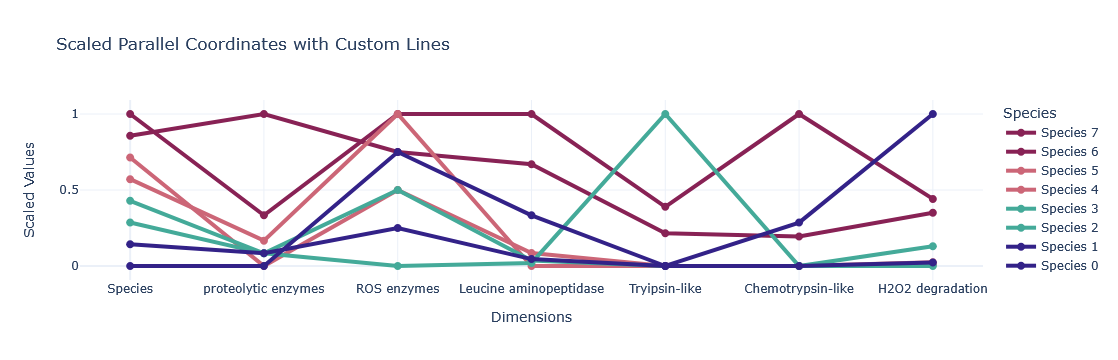

In [56]:
x_ticks = list(range(len(exocols)))  # x-axis positions

fig = go.Figure()

for i, row in df_scaled.iterrows():
    y_vals = [row[col] for col in exocols]
    fig.add_trace(go.Scatter(
        x=x_ticks,
        y=y_vals,
        mode='lines+markers',
        line=dict(color=dfshow['color'][i], width=4),  # use original color
        marker=dict(color=dfshow['color'][i], size=8, symbol='circle'),
        name=f"Species {dfshow['species_id'][i]}",
        hovertext=[f"{col}: {dfshow[col][i]:.2f}" for col in cols],  # original values!
        hoverinfo="text"
    ))

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=x_ticks,
        ticktext=cols_labels,
        title="Dimensions"
    ),
    yaxis=dict(title="Scaled Values"),
    title="Scaled Parallel Coordinates with Custom Lines",
    template="plotly_white",
    legend_title="Species"
)

fig.show()